In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [ ]:
DATADIR= "/content/gdrive/My Drive/Damage_detection_using_CNN"
CATEGORIES=["Damaged","Undamaged"]
#going to iterate through the two categories
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img)) 
        break
    break

In [ ]:
print(img_array.shape)

(540, 1200, 3)


In [ ]:
IMG_SIZE= 200
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

In [ ]:
new_array.shape

(200, 200, 3)

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR,category)#path to dataset
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
print(len(training_data))

1318


In [ ]:
new_array.shape

(200, 200, 3)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
0
1
0


In [ ]:
X_calamity=[]#features
y_calamity=[]#labels

In [ ]:
for features, label in training_data:
    X_calamity.append(features)
    y_calamity.append(label)
    
X_calamity= np.array(X_calamity).reshape(-3,IMG_SIZE,IMG_SIZE,3)

In [ ]:
X_calamity[0].shape

(200, 200, 3)

In [ ]:
X_calamity[1]
y_calamity[1]

0

In [ ]:
X_calamity=X_calamity/255.0 #normalising

In [ ]:
X_calamity.shape[1:]

(200, 200, 3)

In [ ]:
model = Sequential()
#First Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32,input_shape=X_calamity.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=(2,2)))
#third Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='same',
                 activation='relu', name='layer_conv3'))
model.add(MaxPooling2D(pool_size=(2,2)))
#drop-out layer 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=2, strides=2))
#fourth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=(2,2)))
#fifth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv5'))
model.add(MaxPooling2D(pool_size=(2,2)))
#sixth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv6'))
model.add(MaxPooling2D(pool_size=(2,2)))

#seventh Convulational layer
model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

#output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [ ]:
y_calamity=np.array(y_calamity)
X_calamity=np.array(X_calamity)

In [ ]:
model.save("model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 99, 99, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 49, 49, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=0)
#Results 
history=model.fit(X_calamity,y_calamity,batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 8s 223ms/step - loss: 0.6838 - accuracy: 0.5506 - val_loss: 0.6371 - val_accuracy: 0.6364
Epoch 2/100
10/10 [==============================] - 1s 149ms/step - loss: 0.6270 - accuracy: 0.6265 - val_loss: 0.5724 - val_accuracy: 0.6667
Epoch 3/100
10/10 [==============================] - 2s 151ms/step - loss: 0.5777 - accuracy: 0.6931 - val_loss: 0.5752 - val_accuracy: 0.6439
Epoch 4/100
10/10 [==============================] - 2s 153ms/step - loss: 0.5437 - accuracy: 0.7024 - val_loss: 0.5257 - val_accuracy: 0.6894
Epoch 5/100
10/10 [==============================] - 2s 152ms/step - loss: 0.5122 - accuracy: 0.7327 - val_loss: 0.4927 - val_accuracy: 0.7576
Epoch 6/100
10/10 [==============================] - 2s 150ms/step - loss: 0.5089 - accuracy: 0.7361 - val_loss: 0.5155 - val_accuracy: 0.7273
Epoch 7/100
10/10 [==============================] - 2s 151ms/step - loss: 0.4805 - accuracy: 0.7648 - val_loss: 0.5138 - val_accuracy: 0.6894

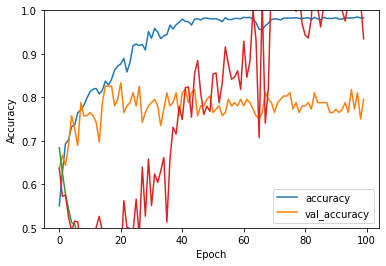

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")

In [ ]:
result = model.evaluate(x=X_calamity,
                         y=y_calamity)

42/42 [==============================] - 1s 16ms/step - loss: 0.1267 - accuracy: 0.9651


In [ ]:
_,img_shape, image_shape,_=X_calamity.shape

In [ ]:
image_shape=img_shape,img_shape,3
image_shape

(200, 200, 3)

In [ ]:
#Helper Function to plot images 
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(image_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    


In [ ]:
#Predictions
images = X_calamity[0:9]

In [ ]:
cls_true =y_calamity[0:9]

In [ ]:
y_pred = model.predict(x=images)

In [ ]:
cls_pred = np.argmax(y_pred, axis=1)

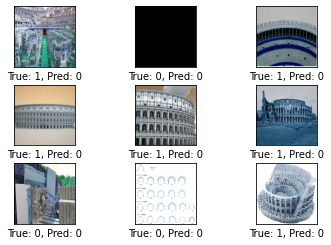

In [ ]:
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)

In [ ]:
#Helper Function to plot incorrect images
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_calamity)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_calamity[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_calamity[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [ ]:
y_pred = model.predict(x=X_calamity)

In [ ]:
cls_pred = np.argmax(y_pred, axis=1)

In [ ]:
!pip install -q pyyaml h5py 

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(200, 200))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("/content/gdrive/MyDrive/Model/model.h5")

    # image path
    img_path = '/content/2NrTmPW9XnRMczrPiRM8M3.jpg'    

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)
    #print(pred)
    if pred<=0.49715963:
      print("Damaged")
    else:
      print("Undamaged")


Damaged


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(200, 200))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("/content/gdrive/MyDrive/Model/model.h5")

    # image path
    img_path = '/content/google-earth-satellite-image_1.jpg'    

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)
    #print(pred)
    if pred<=0.49715963:
      print("Damaged")
    else:
      print("Undamaged")

Undamaged
